In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline


In [2]:
df = pd.read_csv('C:/Users/jomya/Downloads/AmazonStock.csv')
df.head(10)

,date,high,low,open,close,volume,symbol
0,2022-06-09,121.20,121.20,121.20,121.20,200,AMZN
1,2022-06-09,121.00,121.00,121.00,121.00,100,AMZN
2,2022-06-09,121.17,121.11,121.17,121.11,377,AMZN
3,2022-06-09,120.91,120.90,120.91,120.90,1800,AMZN
4,2022-06-09,120.85,120.67,120.81,120.85,4113,AMZN
5,2022-06-09,120.79,120.79,120.79,120.79,610,AMZN
6,2022-06-09,120.96,120.96,120.96,120.96,133,AMZN
7,2022-06-09,120.79,120.79,120.79,120.79,257,AMZN
8,2022-06-09,120.90,120.90,120.90,120.90,100,AMZN
9,2022-06-09,120.90,120.90,120.90,120.90,250,AMZN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24090 entries, 0 to 24089
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    24090 non-null  object 
 1   high    24090 non-null  float64
 2   low     24090 non-null  float64
 3   open    24090 non-null  float64
 4   close   24090 non-null  float64
 5   volume  24090 non-null  int64  
 6   symbol  24090 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB


Text(0.5, 1.0, 'Amazon Closing Price')

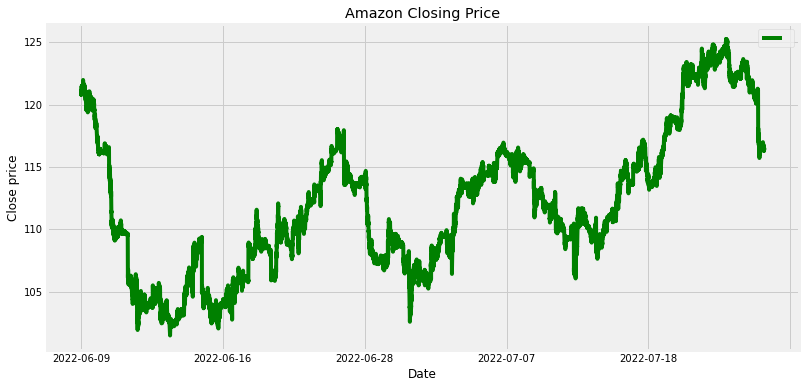

In [4]:
plt.figure(figsize=(12,6))
ax = plt.gca()
df.plot(kind='line',x='date',y='close',ax=ax, label ="", color='green')
plt.ylabel('Close price')
plt.xlabel('Date')
plt.title(f"Amazon Closing Price")


Text(0.5, 1.0, 'Voulme of Amazon stocks sold')

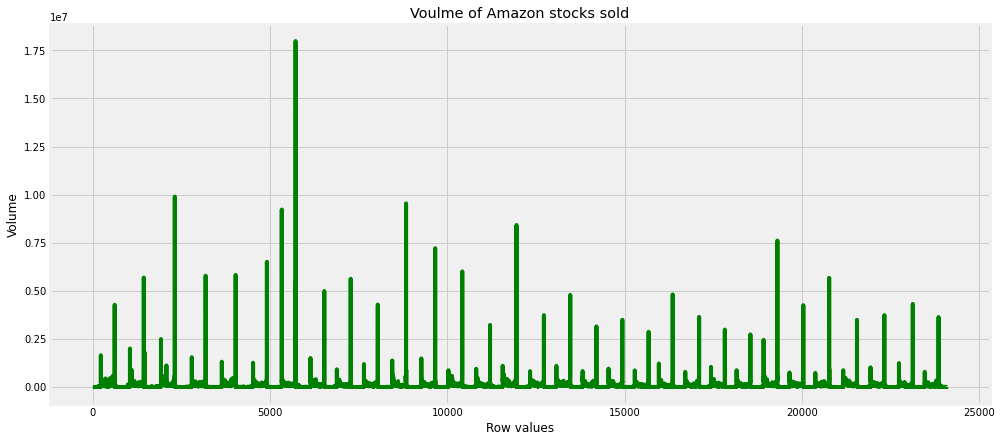

In [5]:
plt.figure(figsize=(15, 7))
df['volume'].plot(color='green')
plt.ylabel('Volume')
plt.xlabel('Row values')
plt.title(f"Voulme of Amazon stocks sold")

In [6]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .60 ))

training_data_len

14454

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.82891971],
       [0.82051282],
       [0.82513661],
       ...,
       [0.62799496],
       [0.62715427],
       [0.62799496]])

In [8]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)


# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

[array([0.82891971, 0.82051282, 0.82513661, 0.81630937, 0.81420765,
       0.81168558, 0.81883144, 0.81168558, 0.81630937, 0.81630937,
       0.81630937, 0.81630937, 0.81294662, 0.81210593, 0.81210593,
       0.81420765, 0.81336696, 0.82051282, 0.82303489, 0.82555696,
       0.81546868, 0.81630937, 0.81630937, 0.82891971, 0.82723834,
       0.82891971, 0.84153005, 0.82891971, 0.83606557, 0.83312316,
       0.83732661, 0.84153005, 0.84153005, 0.83900799, 0.83732661,
       0.83354351, 0.83732661, 0.84153005, 0.84026902, 0.83522488,
       0.83564523, 0.83522488, 0.83102144, 0.83270282, 0.83144178,
       0.82891971, 0.83060109, 0.83102144, 0.83270282, 0.83186213,
       0.83270282, 0.82934006, 0.82681799, 0.83522488, 0.83270282,
       0.83522488, 0.83522488, 0.83522488, 0.83270282, 0.82807902])]
[0.8327028163093741]
[array([0.82891971, 0.82051282, 0.82513661, 0.81630937, 0.81420765,
       0.81168558, 0.81883144, 0.81168558, 0.81630937, 0.81630937,
       0.81630937, 0.81630937, 0.8129

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(30, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(15, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


14394/14394 [==============================] - 345s 24ms/step - loss: 2.7523e-04


In [10]:
#Create the testing data set 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#summary of model
model.summary()

# Get the root mean squared error (RMSE)
rmse_test = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse_test



302/302 [==============================] - 4s 9ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 15)                2760      
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 6,616
Trainable params: 6,616
Non-trainable params: 0
_________________________________________________________________


0.2843762636386927

C:\Users\jomya\AppData\Local\Temp\ipykernel_28232\574464922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


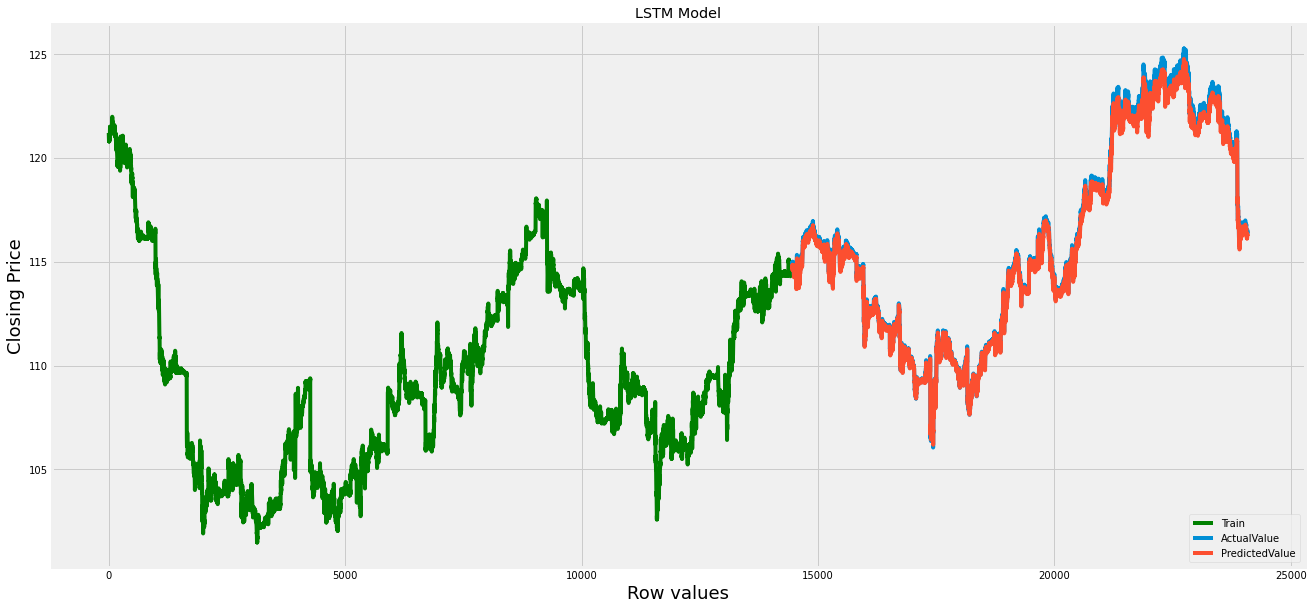

In [11]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(20,10))
plt.title('LSTM Model')
plt.xlabel('Row values', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.plot(train['close'],color='green')
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'ActualValue', 'PredictedValue'], loc='lower right')
plt.show()

In [12]:
def mape(y_test, predictions):
    return np.mean(np.abs((y_test-predictions)/y_test))*100
result = mape(y_test,predictions)
print(result)
accuracy = 100 - result
print(accuracy)

0.18836124883626562
99.81163875116374
